Logistic Regression

Predicting whether a user clicked on an Advertisement

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
ad=pd.read_csv('advertising.csv')

In [4]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [9]:
type(ad['Timestamp'])

pandas.core.series.Series

In [10]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [12]:
ad.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1 ,inplace=True)

In [13]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


Data Visualization

In [24]:
sns.set_style('whitegrid')

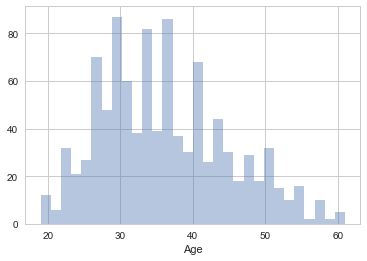

In [25]:
sns.distplot(ad['Age'],bins =30 ,kde=False )

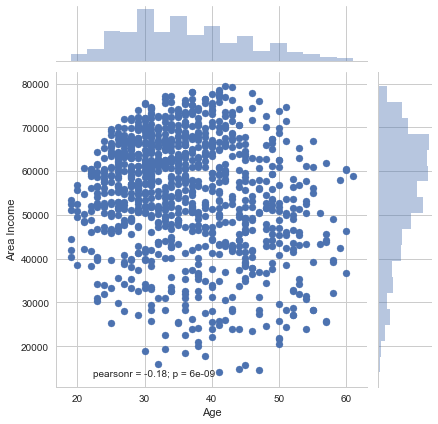

In [26]:
sns.jointplot(x='Age',y='Area Income' , data=ad)

In [30]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Male                        1000 non-null int64
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


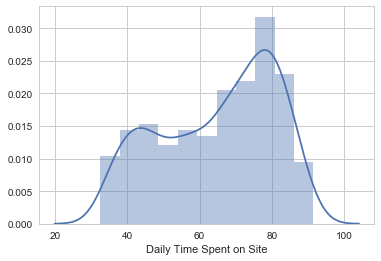

In [31]:
sns.distplot(ad['Daily Time Spent on Site'])

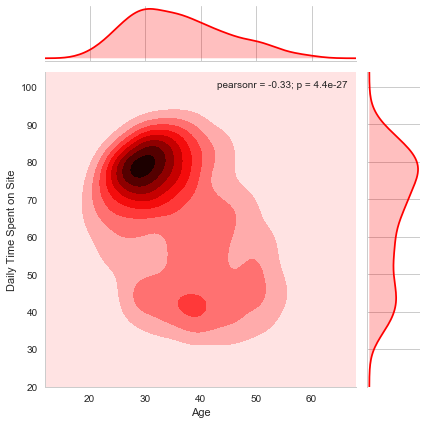

In [38]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad,color='red',kind='kde');

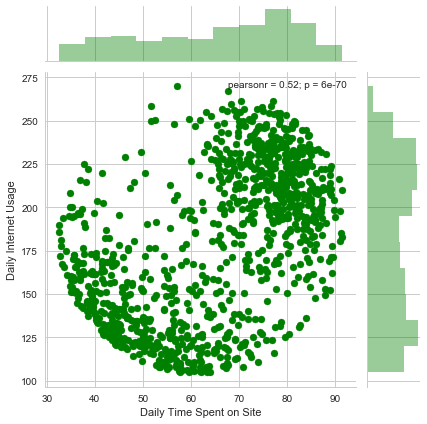

In [40]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad,color='green');

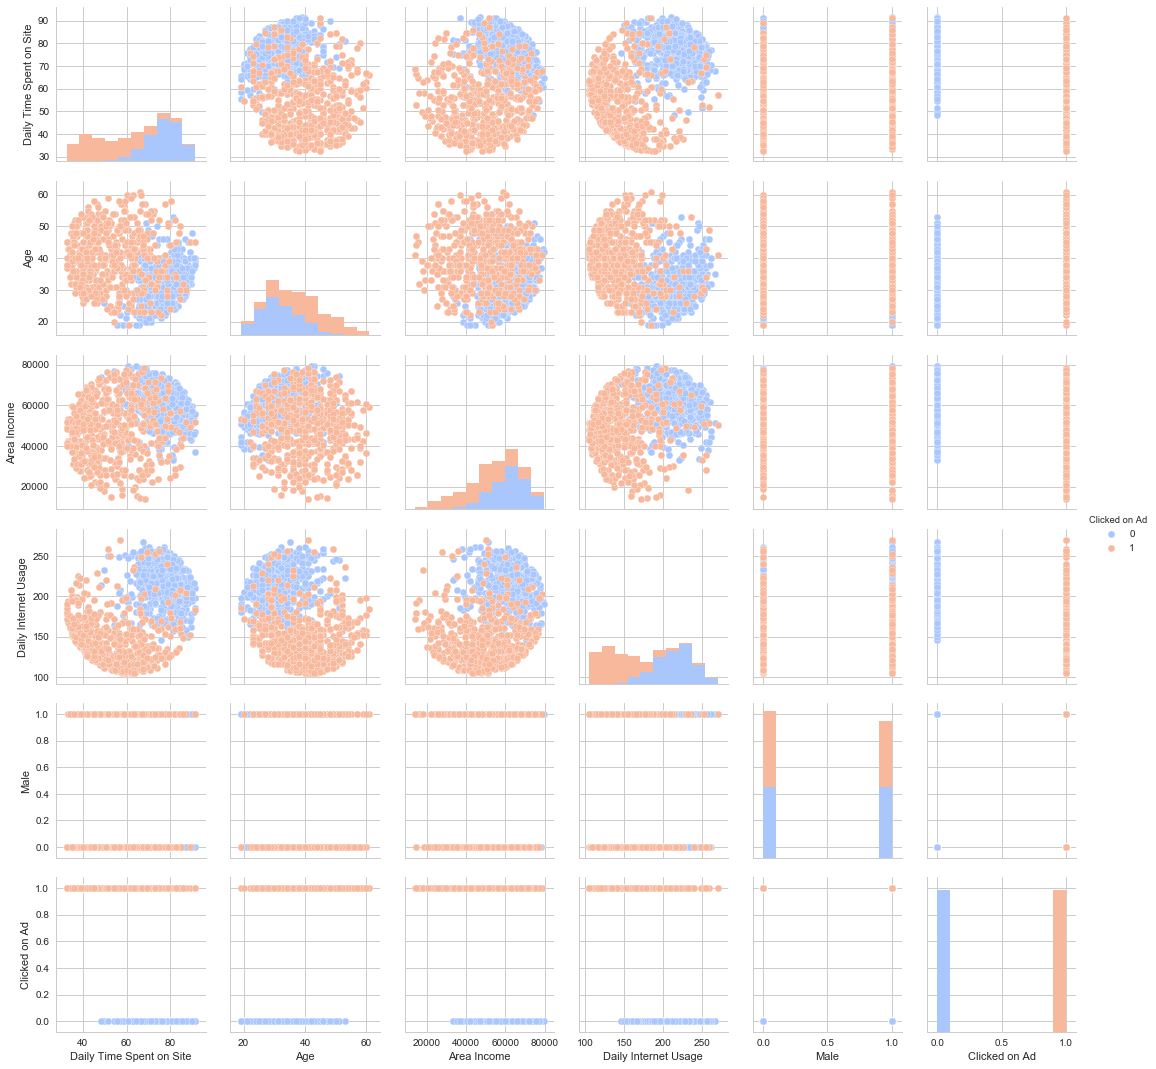

In [42]:
sns.pairplot(data=ad,hue='Clicked on Ad' , palette='coolwarm')

In [44]:
ad.columns


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split

In [50]:
X=ad[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]

In [51]:
y=ad['Clicked on Ad']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lm=LogisticRegression()

In [55]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
predictions = lm.predict(X_test)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330

